Covid-19 has brought the world to a stand still. Countries around the world are grappling to tide over the medical emergency that has put the lives of their entire populations at risk. Governments have to take measured action to control the spread of the disease, at the same time ensuring that their actions do not cause panic among its citizens. Government action is most cases is guided by insights from epidemic modeling. 

Epidemic models are used to calculate the number of people a disease would effect and the time it takes for it to reach a peak. Kermack & McKendrick proposed epidemic models for disease spread (ref: https://link.springer.com/article/10.1007%2FBF02464423) where the population is divided into three groups, Susceptible to infection (S), Infected (I) and Recovered from infection (R). Called S-I-R model, it helps in estimating how the number of infected people varies over time. An extension to this is the S-E-I-R model, where there is a latency period for the disease to exhibit symptoms, after an individual is exposed (E) to it. 

## The SEIR model 

Basic definitions:  
- N: total population  
- S: number of susceptible individuals (who have not had the infection)  
- E: number of individuals exposed to infected people, but have not developed infection yet  
- I: number of infected individuals  
- R: number of recovered/dead individuals
    
The equations for SEIR model are given by 

## $ \frac{dS}{dt} = -\beta SI$

## $ \frac{dE}{dt} = \beta SI - \alpha E $
 
## $ \frac{dI}{dt} = \alpha E - \gamma I $

## $ \frac{dR}{dt} = \gamma I $

where  
- $\beta $ is the average contact rate in population, between the susceptible and infected individuals
- $\alpha $ is the inverse of incubation period $ 1/t_{inc}$
- $\gamma $ is the inverse of mean infectiuous period $ 1/ t_{inf} $

## Basic reproduction number R0

R0 of any infectious disease is expected number of cases generated by one infectious case in the population. Here   

## $ R0 = \frac{\beta}{\gamma} $

## Parameters

In [17]:
### Incubation period 
### (https://annals.org/aim/fullarticle/2762808/incubation-period-coronavirus-disease-2019-covid-19-from-publicly-reported)
DInc = 5 # days
alpha = 1/DInc
print (alpha)

### Infectious period
### https://www.who.int/bulletin/online_first/20-255695.pdf
DInf = 2.3 #days
gamma = 1/DInf
print (gamma)

## Infected to suspected ratio
## (https://www.who.int/bulletin/online_first/20-255695.pdf)
isratio = 2.4

0.2
0.4347826086956522


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import mean_squared_error as mse

In [19]:
def rettable(url):
    tbls = pd.read_html(url)
    lst = []
    for t in tbls:
        return (t)
    return ()

In [20]:
# URLS to download data
confirmed = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
print (confirmed)
print (deaths)

https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [21]:
confdf = rettable(confirmed)
deaddf = rettable(deaths)

In [39]:
def cleantbl(df, country):
    new = df[df['Country/Region'] == country]
    new = new.groupby('Country/Region').agg('sum')
    new = new.reset_index()
    newT = new.T
    newTH = newT[5:]
    newTH = newTH.reset_index()
    newTH.columns = ['Date', 'Cases']
    newTH['Date'] = pd.to_datetime(newTH['Date'], infer_datetime_format = True)
    newTH['Cases'] = newTH['Cases'].astype(int)
    #newTH['LogCases'] = newTH['Cases'].apply(lambda x: np.log(1+x))
    return (newTH)

def getcountdays(df, country, minlim=100, maxlim=500):
    newdf  = cleantbl(df, country)
    #print (newdf.head())
    d1 = newdf[newdf['Cases'] > minlim]['Date'].min()
    d2 = newdf[newdf['Cases'] > maxlim]['Date'].min()
    dt = d2-d1
    return (dt.days)

def avgdailycases(df, country, minlim=100): #maxlim=500):
    newdf  = cleantbl(df, country)
    #print (newdf.head())
    d1 = newdf[newdf['Cases'] > minlim]['Date'].min()
    c1 = newdf[newdf['Cases'] > minlim]['Cases'].min()
    #d2 = newdf[newdf['Cases'] > maxlim]['Date'].min()
    d2 = newdf['Date'].iloc[-1]
    c2 = newdf['Cases'].iloc[-1]
    dt = (d2-d1).days
    avgdaily = int((c2-c1)/(dt))
    return (c2, dt, avgdaily)

def weeklynew(df, country, minlim=100): #maxlim=500):
    newdf  = cleantbl(df, country)
    
    d1 = newdf[newdf['Cases'] > minlim]['Date'].min()
    c1 = newdf[newdf['Cases'] > minlim]['Cases'].min()
    
    d2 = newdf['Date'].iloc[-1]
    dt = (d2-d1).days
    nweeks = int(dt/7)
    
    tl  = []
    dcrr = d1
    ccrr = int(c1)
    
    for i in range(nweeks+1):
        dwe = dcrr + datetime.timedelta(days=7)
        if (dwe > d2):
            dwe = d2
        print (dwe)
        cwe = newdf[newdf['Date'] == dwe]['Cases'].min()
        print (cwe)
        wavg = int(cwe - ccrr)
        tl.append((dcrr, dwe,int(ccrr), int(cwe), int(wavg)))
        dcrr = dwe
        ccrr = cwe
        
    tldf = pd.DataFrame(tl)
    
    tldf.columns = ['CurrentDate', 'WeekDate', 'CurrentCases', 'WeekCases', 'WeeklyAverage']
    return (tldf)

In [40]:
print (list(confdf['Country/Region']))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Dia

In [41]:
#Get the countries with the highest number of cases
datecheck = '3/30/20'
df = confdf.groupby(['Country/Region']).agg('sum')
df = df.reset_index()
df = df[['Country/Region', datecheck]]
df = df[df[datecheck] > 100]
df = df.sort_values(datecheck, ascending=False)
df.columns = ['Country', '#ConfirmedCases']

Text(0.5, 0, '# Confirmed Cases in 1000s')

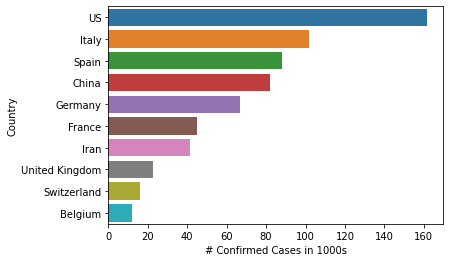

In [42]:
aa = df.head(10)
ax = sns.barplot(aa['#ConfirmedCases']/1000, aa['Country'])
ax.set_xlabel('# Confirmed Cases in 1000s')

In [43]:
## Average number of cases per day
ll = []
for cnt in aa['Country']:
    print (cnt)
    current, days, avgda = avgdailycases(confdf, cnt)
    ll.append((cnt, current, days, avgda))

lldf = pd.DataFrame(ll)
lldf.columns = ['Country', '#Cases', 'NoOfDays', 'Avg Daily']

US
Italy
Spain
China
Germany
France
Iran
United Kingdom
Switzerland
Belgium


In [44]:
lldf

,Country,#Cases,NoOfDays,Avg Daily
0,US,188172,28,6716
1,Italy,105792,37,2855
2,Spain,95923,29,3303
3,China,82279,68,1200
4,Germany,71808,30,2389
5,France,52827,30,1756
6,Iran,44605,34,1307
7,United Kingdom,25481,26,975
8,Switzerland,16605,26,634
9,Belgium,12775,25,506


Text(0.5, 0, 'Average Daily Cases since 100th case')

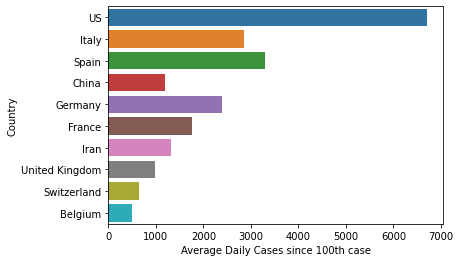

In [45]:
aa = df.head(10)
ax = sns.barplot(lldf['Avg Daily'], lldf['Country'])
ax.set_xlabel('Average Daily Cases since 100th case')

In [56]:
wn = weeklynew(confdf, 'US')

2020-03-10 00:00:00
959
2020-03-17 00:00:00
6421
2020-03-24 00:00:00
53740
2020-03-31 00:00:00
188172
2020-03-31 00:00:00
188172


In [57]:
wn['Week'] = 'WS ' + wn['CurrentDate'].astype(str) 
wn = wn[:-1]
wn.head()

,CurrentDate,WeekDate,CurrentCases,WeekCases,WeeklyAverage,Week
0,2020-03-03,2020-03-10,118,959,841,WS 2020-03-03
1,2020-03-10,2020-03-17,959,6421,5462,WS 2020-03-10
2,2020-03-17,2020-03-24,6421,53740,47319,WS 2020-03-17
3,2020-03-24,2020-03-31,53740,188172,134432,WS 2020-03-24


In [62]:
188172-53740

134432

Text(0.5, 1.0, 'US')

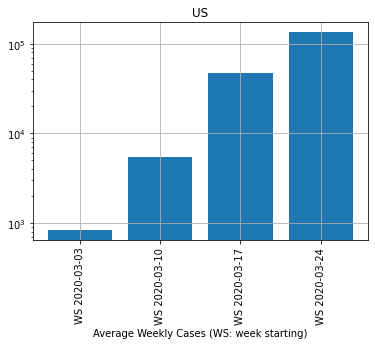

In [58]:
#aa = df.head(10)
plt.bar('Week', 'WeeklyAverage', data=wn)
plt.xticks(rotation=90)
plt.yscale('log')
plt.grid(True)
plt.xlabel('Average Weekly Cases (WS: week starting)')
plt.title('US')

In [16]:
wn['WeeklyAverage']

0       841
1      6303
2     53622
3    161689
Name: WeeklyAverage, dtype: int64

In [ ]:
wn

In [38]:
def timetodouble(df, country):
    '''
    estimating time to double since the 100th case
    '''
    
    cntdf = cleantbl(df, country)
    cntdf['Cases']
    cntdf['DailyCases'] = cntdf['Cases'].diff()
    
    cnt100 = cntdf
    print (len(cnt100))
    
    dtl = []
    
    
    cc1 = 1
    dt1 = cnt100[cnt100['Cases'] >= 1]['Date'].min()
    print (dt1, cc1)
        
    for i in range(len(cnt100)):
        if (cnt100['Date'].max() > dt1):
            cc2 = 2*cc1
            dt2 = cnt100[cnt100['Cases'] >= cc2]['Date'].min()
            ndays  = (dt2-dt1).days

            cc1 = cc2
            dt1 = dt2

            dtl.append((cc1, dt1, cc2, dt2, ndays))    
            
    dtldf = pd.DataFrame(dtl)
    dtldf.columns = ['Cases1', 'Date1', 'Cases2', 'Date2', 'Ndays']
    
    return (dtldf)

In [39]:
US = timetodouble(confdf, 'US')
US1 = US[US['Cases2'] > 100]
print (US1.head())

68
2020-01-23 00:00:00 1
    Cases1      Date1  Cases2      Date2  Ndays
6      128 2020-03-04     128 2020-03-04    4.0
7      256 2020-03-06     256 2020-03-06    2.0
8      512 2020-03-08     512 2020-03-08    2.0
9     1024 2020-03-11    1024 2020-03-11    3.0
10    2048 2020-03-13    2048 2020-03-13    2.0


In [40]:
Italy = timetodouble(confdf, 'Italy')
Italy1 = Italy[Italy['Cases2'] > 100]

68
2020-01-31 00:00:00 1


In [41]:
Spain = timetodouble(confdf, 'Spain')
Spain1 = Spain[Spain['Cases2'] > 100]

68
2020-02-01 00:00:00 1


In [42]:
xlist = []
for i in range(18):
    xlist.append(2**i)
print (xlist)

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]


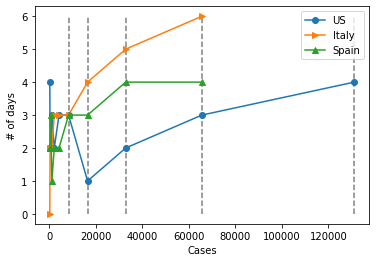

In [43]:
#plt.figure(figsize = (30,10))
plt.plot(US1['Cases2'], US1['Ndays'], '-o')
plt.plot(Italy1['Cases2'], Italy1['Ndays'], '->')
plt.plot(Spain1['Cases2'], Spain1['Ndays'], '-^')
plt.legend(['US', 'Italy', 'Spain'])
plt.ylabel('# of days')
plt.xlabel('Cases')
plt.vlines((8192, 16384, 32768, 65536, 131072), 0, 6, linestyles = 'dashed', alpha=0.5)
#plt.grid(True)
plt.show()

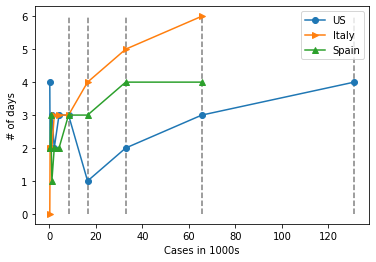

In [44]:
#plt.figure(figsize = (30,10))
plt.plot(US1['Cases2']/1000, US1['Ndays'], '-o')
plt.plot(Italy1['Cases2']/1000, Italy1['Ndays'], '->')
plt.plot(Spain1['Cases2']/1000, Spain1['Ndays'], '-^')
plt.legend(['US', 'Italy', 'Spain'])
plt.ylabel('# of days')
plt.xlabel('Cases in 1000s')
plt.vlines((8.192, 16.384, 32.768, 65.536, 131.072), 0, 6, linestyles = 'dashed', alpha=0.5)
#plt.grid(True)
plt.show()

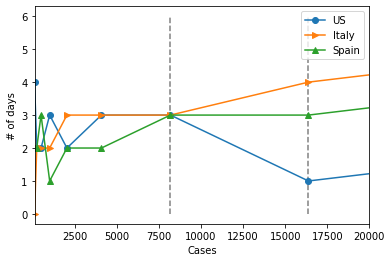

In [25]:
#plt.figure(figsize = (30,10))
plt.plot(US1['Cases2'], US1['Ndays'], '-o')
plt.plot(Italy1['Cases2'], Italy1['Ndays'], '->')
plt.plot(Spain1['Cases2'], Spain1['Ndays'], '-^')
plt.legend(['US', 'Italy', 'Spain'])
plt.ylabel('# of days')
plt.xlabel('Cases')
plt.vlines((8192, 16384, 32768, 65536, 131072), 0, 6, linestyles = 'dashed', alpha=0.5)
plt.xlim(128,20000)
plt.show()

In [26]:
SKorea = timetodouble(confdf, 'Korea, South')
SKorea.head()
SKorea1 = SKorea[SKorea['Cases2'] > 100]

68
2020-01-23 00:00:00


In [27]:
Taiwan = timetodouble(confdf, 'Taiwan*')
Taiwan1 = Taiwan[Taiwan['Cases2'] > 100]
print (Taiwan1.head())

68
2020-01-23 00:00:00
   Cases1      Date1  Cases2      Date2  Ndays
6     128 2020-03-20     128 2020-03-20    4.0
7     256 2020-03-27     256 2020-03-27    7.0
8     512        NaT     512        NaT    NaN


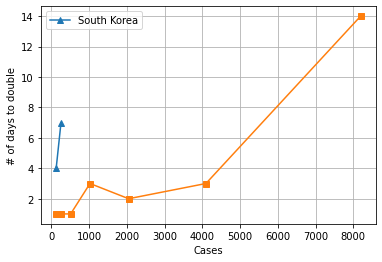

In [29]:
plt.plot(Taiwan1['Cases2'], Taiwan1['Ndays'], '-^')
plt.plot(SKorea1['Cases2'], SKorea1['Ndays'], '-s')
plt.legend(['South Korea'])
plt.ylabel('# of days to double')
plt.xlabel('Cases')
plt.grid(True)
plt.show()